In [185]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [134]:
df = pd.read_csv('E:\\Desktop\\Statistical Learning II\\project 1\\drug_consumption.csv')

In [135]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [136]:
df.drop(columns=['ID'],inplace=True)

In [137]:
type(df)

pandas.core.frame.DataFrame

In [138]:
data = df.copy()

In [139]:
# Convert categorical values to human readable
age_col = {
          -0.95197: '18-24',
          -0.07854: '25 - 34',
          0.49788: '35 - 44',
          1.09449: '45 - 54',
          1.82213: '55 - 64',
          2.59171: '65+'
          }
df['Age'] = df['Age'].replace(age_col)

In [140]:
gender_col = {
            0.48246: 'Female',
            -0.48246: 'Male'
            }
df['Gender'] = df['Gender'].replace(gender_col)

In [141]:
education_col = {
            -2.43591: 'Left School Before 16 years',
            -1.73790: 'Left School at 16 years',
            -1.43719: 'Left School at 17 years',
            -1.22751: 'Left School at 18 years',
            -0.61113: 'Some College,No Certificate Or Degree',
            -0.05921: 'Professional Certificate/ Diploma',
            0.45468: 'University Degree',
            1.16365: 'Masters Degree',
            1.98437: 'Doctorate Degree',
            }
df['Education'] = df['Education'].replace(education_col)
df['Education'] = pd.Categorical(df['Education'], ['Left School Before 16 years',
                               'Left School at 16 years',
                               'Left School at 17 years',
                               'Left School at 18 years',
                               'Some College,No Certificate Or Degree',
                               'Professional Certificate/ Diploma',
                               'University Degree',
                               'Masters Degree',
                               'Doctorate Degree'
                              ])


In [142]:
country_col = {
            -0.09765: 'Australia',
            0.24923: 'Canada',
            -0.46841: 'New Zealand',
            -0.28519: 'Other',
            0.21128: 'Republic of Ireland',
            0.96082: 'UK',
            -0.57009: 'USA'
            }
df['Country'] = df['Country'].replace(country_col)

In [143]:
df.drop(columns=['Ethnicity'],inplace=True)

In [144]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,35 - 44,Female,Professional Certificate/ Diploma,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25 - 34,Male,Doctorate Degree,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35 - 44,Male,Professional Certificate/ Diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,Masters Degree,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35 - 44,Female,Doctorate Degree,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [145]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Nscore', 'Escore', 'Oscore',
       'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl',
       'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',
       'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine',
       'Semer', 'VSA'],
      dtype='object')

In [146]:
scores = ('Nscore', 'Escore', 'Oscore','Ascore', 'Cscore', 'Impulsive', 'SS')

In [147]:
def categorize_score(value):
    if value <= -1:
        return 'Very Low'
    elif -1 < value <= 0:
        return 'Low'
    elif 0 < value < 1:
        return 'High'
    else:
        return 'Very High'

In [148]:
# List of score columns
score_columns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Apply the categorization function to each score column in place
for col in score_columns:
    df[col] = df[col].apply(categorize_score)

# Display the first few rows to confirm the changes
print(df.head())

       Age  Gender                          Education Country Nscore  \
0  35 - 44  Female  Professional Certificate/ Diploma      UK   High   
1  25 - 34    Male                   Doctorate Degree      UK    Low   
2  35 - 44    Male  Professional Certificate/ Diploma      UK    Low   
3    18-24  Female                     Masters Degree      UK    Low   
4  35 - 44  Female                   Doctorate Degree      UK   High   

      Escore     Oscore    Ascore     Cscore Impulsive  ... Ecstasy Heroin  \
0        Low        Low       Low        Low       Low  ...     CL0    CL0   
1  Very High  Very High      High        Low       Low  ...     CL4    CL0   
2       High        Low  Very Low   Very Low  Very Low  ...     CL0    CL0   
3        Low        Low      High       High  Very Low  ...     CL0    CL0   
4   Very Low        Low       Low  Very High       Low  ...     CL1    CL0   

  Ketamine Legalh  LSD Meth Mushrooms Nicotine Semer  VSA  
0      CL0    CL0  CL0  CL0       CL0 

In [149]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,35 - 44,Female,Professional Certificate/ Diploma,UK,High,Low,Low,Low,Low,Low,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25 - 34,Male,Doctorate Degree,UK,Low,Very High,Very High,High,Low,Low,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35 - 44,Male,Professional Certificate/ Diploma,UK,Low,High,Low,Very Low,Very Low,Very Low,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,Masters Degree,UK,Low,Low,Low,High,High,Very Low,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35 - 44,Female,Doctorate Degree,UK,High,Very Low,Low,Low,Very High,Low,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [150]:
df['Semer'].unique()

array(['CL0', 'CL2', 'CL3', 'CL4', 'CL1'], dtype=object)

In [151]:
df['Semer'].value_counts()

Semer
CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: count, dtype: int64

In [152]:
df.shape

(1885, 30)

In [153]:
categories_to_remove = ['CL2', 'CL3', 'CL1', 'CL4']

# Remove the rows with these categories in the 'Semer' column
df = df[~df['Semer'].isin(categories_to_remove)]

In [154]:
df['Age'].unique()

array(['35 - 44', '25 - 34', '18-24', '65+', '45 - 54', '55 - 64'],
      dtype=object)

In [155]:
df['Age'] = df['Age'].replace({'55 - 64': '55+', '65+': '55+'})

# Display the unique values in the 'Age' column to confirm the change
print(df['Age'].unique())

['35 - 44' '25 - 34' '18-24' '55+' '45 - 54']


In [156]:
df['Alcohol'].unique()

array(['CL5', 'CL6', 'CL4', 'CL2', 'CL1', 'CL0', 'CL3'], dtype=object)

In [157]:
drugs=['Alcohol', 'Amphet', 'Amyl','Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy','Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']

In [158]:
df.drop(columns=['Semer'],inplace=True)

In [159]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 
         'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
         'Mushrooms', 'Nicotine', 'VSA']

# Define the mappings for the categories
category_mapping = {
    'CL5': 'active',
    'CL6': 'active',
    'CL4': 'active',
    'CL2': 'inactive',
    'CL1': 'inactive',
    'CL0': 'inactive',
    'CL3': 'inactive'
}

# Apply the mapping to each drug column
for drug in drugs:
    df[drug] = df[drug].replace(category_mapping)

# Display the first few rows to confirm the changes
print(df.head())

       Age  Gender                          Education Country Nscore  \
0  35 - 44  Female  Professional Certificate/ Diploma      UK   High   
1  25 - 34    Male                   Doctorate Degree      UK    Low   
2  35 - 44    Male  Professional Certificate/ Diploma      UK    Low   
3    18-24  Female                     Masters Degree      UK    Low   
4  35 - 44  Female                   Doctorate Degree      UK   High   

      Escore     Oscore    Ascore     Cscore Impulsive  ...     Crack  \
0        Low        Low       Low        Low       Low  ...  inactive   
1  Very High  Very High      High        Low       Low  ...  inactive   
2       High        Low  Very Low   Very Low  Very Low  ...  inactive   
3        Low        Low      High       High  Very Low  ...  inactive   
4   Very Low        Low       Low  Very High       Low  ...  inactive   

    Ecstasy    Heroin  Ketamine    Legalh       LSD      Meth Mushrooms  \
0  inactive  inactive  inactive  inactive  inactive  

In [160]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,35 - 44,Female,Professional Certificate/ Diploma,UK,High,Low,Low,Low,Low,Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
1,25 - 34,Male,Doctorate Degree,UK,Low,Very High,Very High,High,Low,Low,...,inactive,active,inactive,inactive,inactive,inactive,inactive,inactive,active,inactive
2,35 - 44,Male,Professional Certificate/ Diploma,UK,Low,High,Low,Very Low,Very Low,Very Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
3,18-24,Female,Masters Degree,UK,Low,Low,Low,High,High,Very Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive
4,35 - 44,Female,Doctorate Degree,UK,High,Very Low,Low,Low,Very High,Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive


In [161]:
stimulants = ['Choc', 'Caff', 'Amphet', 'Coke', 'Crack', 'Meth', 'Nicotine']
depressants = ['Alcohol', 'Benzos', 'Heroin', 'Legalh', 'Amyl', 'VSA']
hallucinogens = ['LSD', 'Mushrooms', 'Ketamine', 'Cannabis', 'Ecstasy']

In [162]:
# Define the mapping of each drug to its respective category
drug_to_category = {
    'Choc': 'Stimulants',
    'Caff': 'Stimulants',
    'Amphet': 'Stimulants',
    'Coke': 'Stimulants',
    'Crack': 'Stimulants',
    'Meth': 'Stimulants',
    'Nicotine': 'Stimulants',
    'Alcohol': 'Depressants',
    'Benzos': 'Depressants',
    'Heroin': 'Depressants',
    'Legalh': 'Depressants',
    'Amyl': 'Depressants',
    'VSA': 'Depressants',
    'LSD': 'Hallucinogens',
    'Mushrooms': 'Hallucinogens',
    'Ketamine': 'Hallucinogens',
    'Cannabis': 'Hallucinogens',
    'Ecstasy': 'Hallucinogens'
}

In [69]:
# Create a new column to store the merged categories
df['Drug_Category'] = df[drugs].apply(lambda x: next((drug_to_category[col] for col in x.index if x[col] == 'active'), 'inactive'), axis=1)

# Drop the original drug columns
df = df.drop(columns=drugs)

# Display the first few rows to confirm the changes
print(df.head())

       Age  Gender                          Education Country Nscore  \
0  35 - 44  Female  Professional Certificate/ Diploma      UK   High   
1  25 - 34    Male                   Doctorate Degree      UK    Low   
2  35 - 44    Male  Professional Certificate/ Diploma      UK    Low   
3    18-24  Female                     Masters Degree      UK    Low   
4  35 - 44  Female                   Doctorate Degree      UK   High   

      Escore     Oscore    Ascore     Cscore Impulsive        SS Drug_Category  
0        Low        Low       Low        Low       Low  Very Low   Depressants  
1  Very High  Very High      High        Low       Low       Low   Depressants  
2       High        Low  Very Low   Very Low  Very Low      High   Depressants  
3        Low        Low      High       High  Very Low  Very Low   Depressants  
4   Very Low        Low       Low  Very High       Low       Low   Depressants  


In [70]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Drug_Category
0,35 - 44,Female,Professional Certificate/ Diploma,UK,High,Low,Low,Low,Low,Low,Very Low,Depressants
1,25 - 34,Male,Doctorate Degree,UK,Low,Very High,Very High,High,Low,Low,Low,Depressants
2,35 - 44,Male,Professional Certificate/ Diploma,UK,Low,High,Low,Very Low,Very Low,Very Low,High,Depressants
3,18-24,Female,Masters Degree,UK,Low,Low,Low,High,High,Very Low,Very Low,Depressants
4,35 - 44,Female,Doctorate Degree,UK,High,Very Low,Low,Low,Very High,Low,Low,Depressants


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df['Drug_Category'].unique()

array(['Depressants', 'Stimulants', 'inactive', 'Hallucinogens'],
      dtype=object)

In [133]:

drug_to_category = {
    'Choc': 'Stimulants',
    'Caff': 'Stimulants',
    'Amphet': 'Stimulants',
    'Coke': 'Stimulants',
    'Crack': 'Stimulants',
    'Meth': 'Stimulants',
    'Nicotine': 'Stimulants',
    'Alcohol': 'Depressants',
    'Benzos': 'Depressants',
    'Heroin': 'Depressants',
    'Legalh': 'Depressants',
    'Amyl': 'Depressants',
    'VSA': 'Depressants',
    'LSD': 'Hallucinogens',
    'Mushrooms': 'Hallucinogens',
    'Ketamine': 'Hallucinogens',
    'Cannabis': 'Hallucinogens',
    'Ecstasy': 'Hallucinogens'
}



  Drug_Category
0          None
1          None
2          None
3          None
4          None


In [165]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Drug_Category
0,35 - 44,Female,Professional Certificate/ Diploma,UK,High,Low,Low,Low,Low,Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,Depressants
1,25 - 34,Male,Doctorate Degree,UK,Low,Very High,Very High,High,Low,Low,...,active,inactive,inactive,inactive,inactive,inactive,inactive,active,inactive,Hallucinogens
2,35 - 44,Male,Professional Certificate/ Diploma,UK,Low,High,Low,Very Low,Very Low,Very Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,Depressants
3,18-24,Female,Masters Degree,UK,Low,Low,Low,High,High,Very Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,Depressants
4,35 - 44,Female,Doctorate Degree,UK,High,Very Low,Low,Low,Very High,Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,Depressants


In [163]:
# Initialize an empty column for the drug categories
df['Drug_Category'] = None

# Assign categories based on active drug usage
for drug, category in drug_to_category.items():
    if drug in df.columns:
        # If the drug is "active", assign the appropriate category
        df.loc[df[drug] == 'active', 'Drug_Category'] = category

# View the updated dataframe
print(df[['Drug_Category']].head())

   Drug_Category
0    Depressants
1  Hallucinogens
2    Depressants
3    Depressants
4    Depressants


In [164]:
df['Drug_Category'].unique()

array(['Depressants', 'Hallucinogens', 'Stimulants', None], dtype=object)

In [166]:
df[df['Drug_Category'].isna()]

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Drug_Category
128,35 - 44,Male,Doctorate Degree,UK,High,High,High,High,High,Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,None
973,55+,Male,Masters Degree,USA,Very Low,High,High,High,High,High,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,None
1267,25 - 34,Female,Professional Certificate/ Diploma,UK,Very Low,Low,Very Low,High,High,Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,None
1277,18-24,Male,University Degree,UK,High,High,Low,Very Low,High,Very High,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,None
1743,35 - 44,Female,Masters Degree,UK,Low,Low,Low,High,High,Low,...,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,inactive,None


In [169]:
df.shape

(1872, 30)

In [168]:
df = df[df['Drug_Category'].notna()]

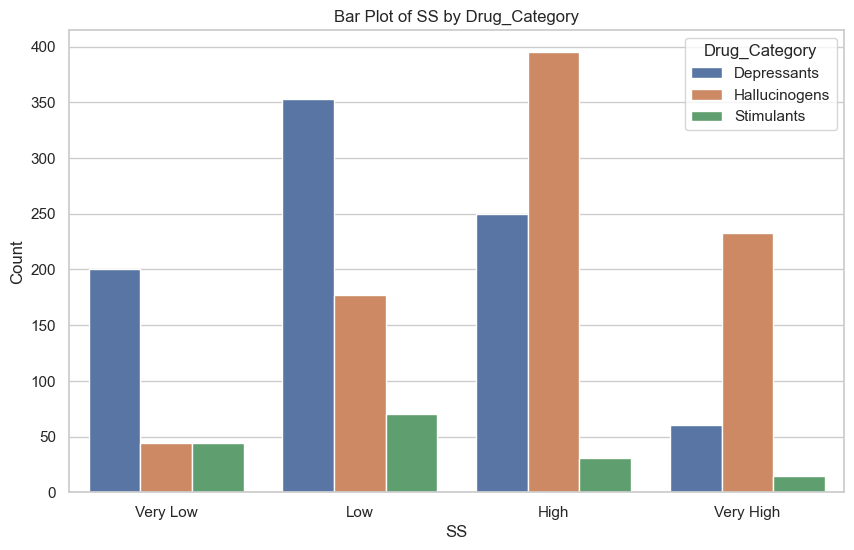

In [170]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SS', hue='Drug_Category', data=df)

# Set labels and title
plt.xlabel('SS')
plt.ylabel('Count')
plt.title('Bar Plot of SS by Drug_Category')

# Show the plot
plt.show()

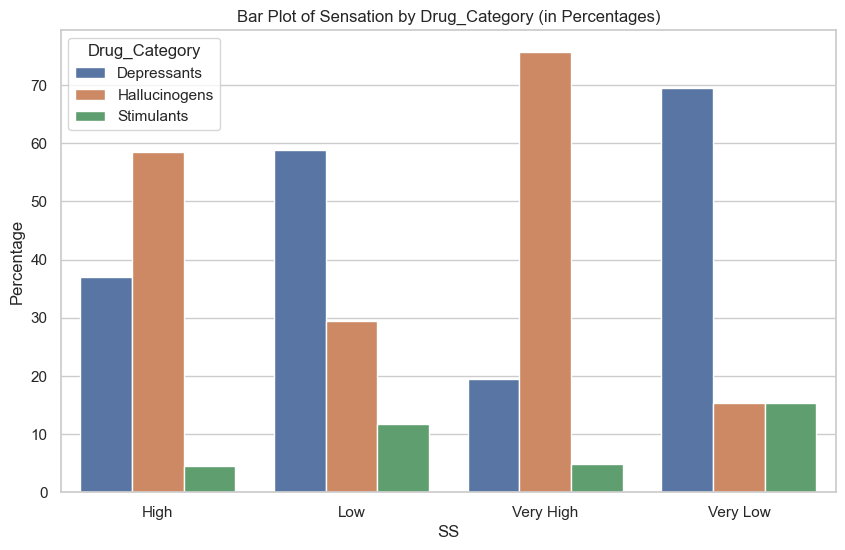

In [171]:
# Calculate the percentages for each combination of SS and Drug_Category
df_percentage = df.groupby(['SS', 'Drug_Category']).size().reset_index(name='Count')
df_percentage['Percentage'] = df_percentage['Count'] / df_percentage.groupby('SS')['Count'].transform('sum') * 100

# Create a bar plot with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='SS', y='Percentage', hue='Drug_Category', data=df_percentage)

# Set labels and title
plt.xlabel('SS')
plt.ylabel('Percentage')
plt.title('Bar Plot of Sensation by Drug_Category (in Percentages)')

# Show the plot
plt.show()

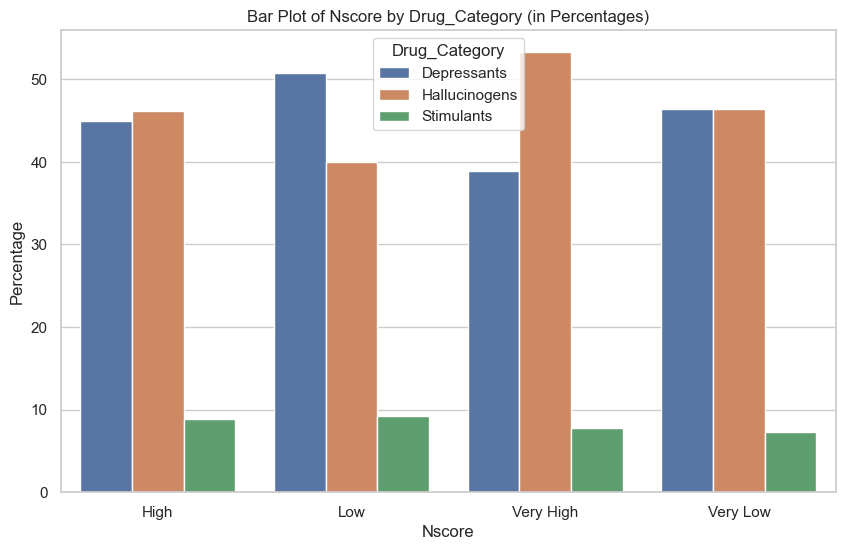

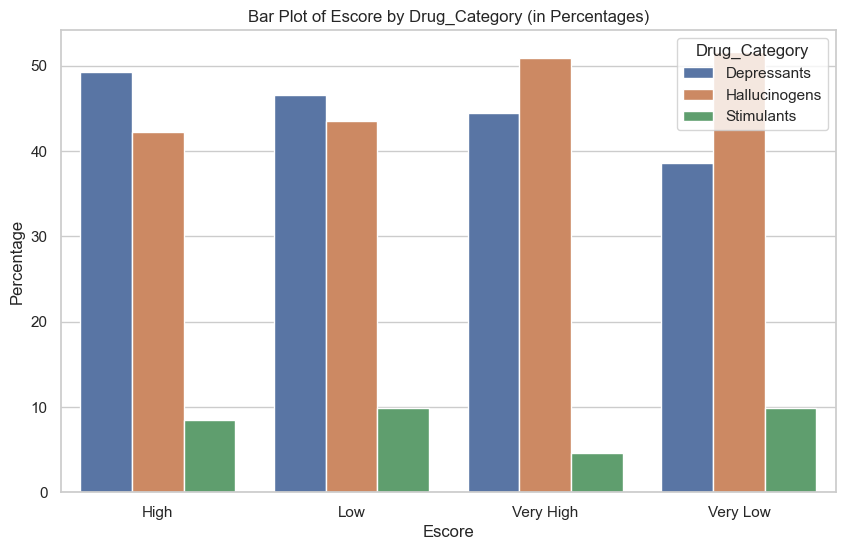

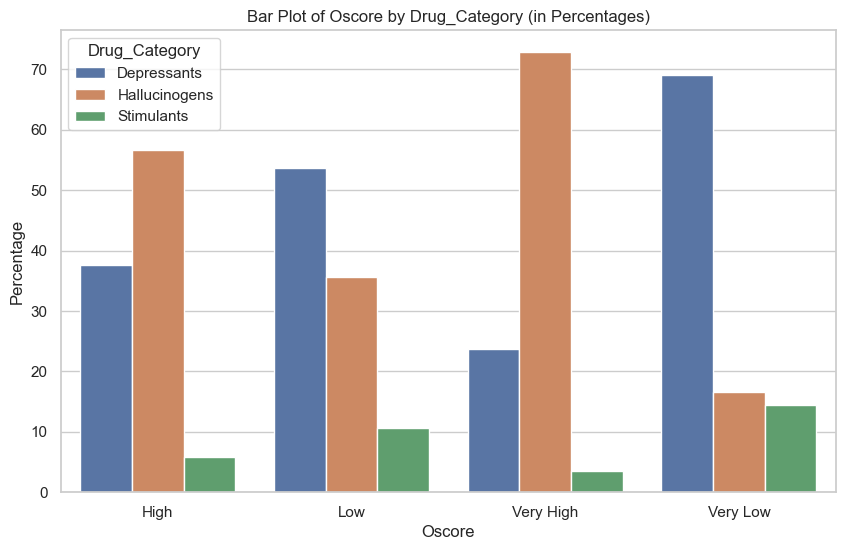

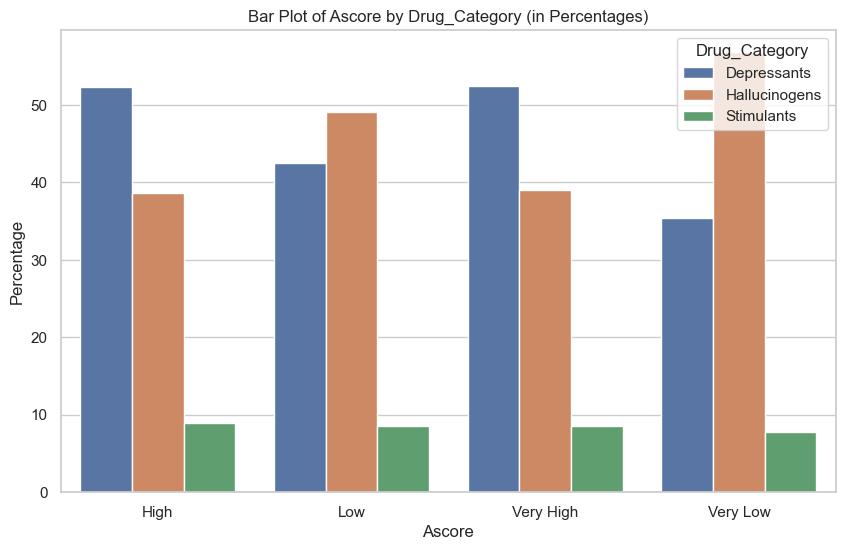

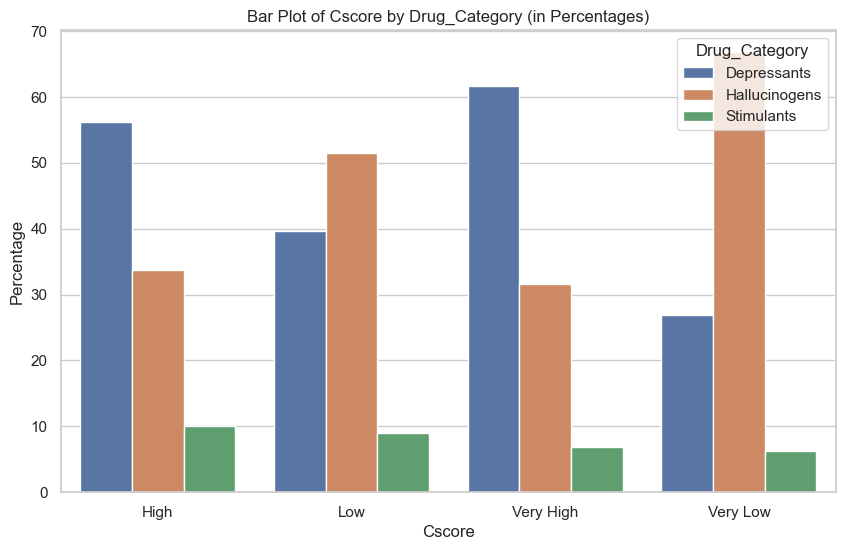

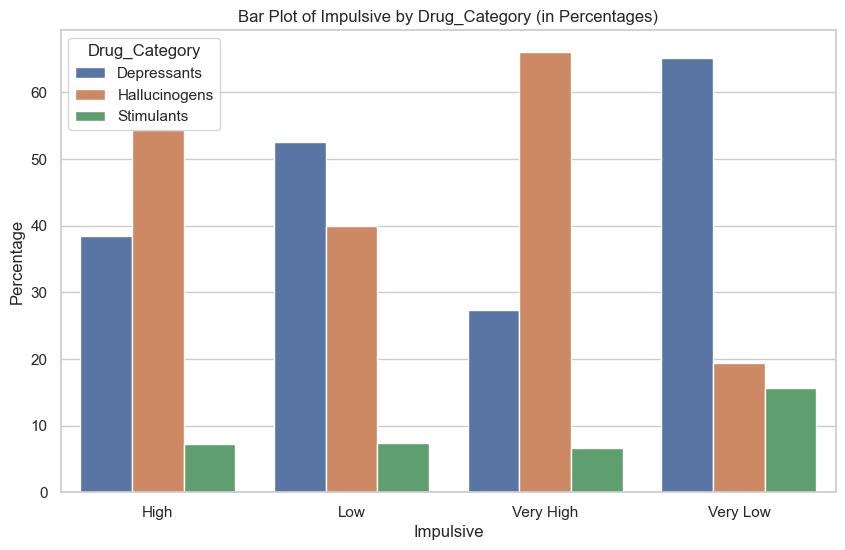

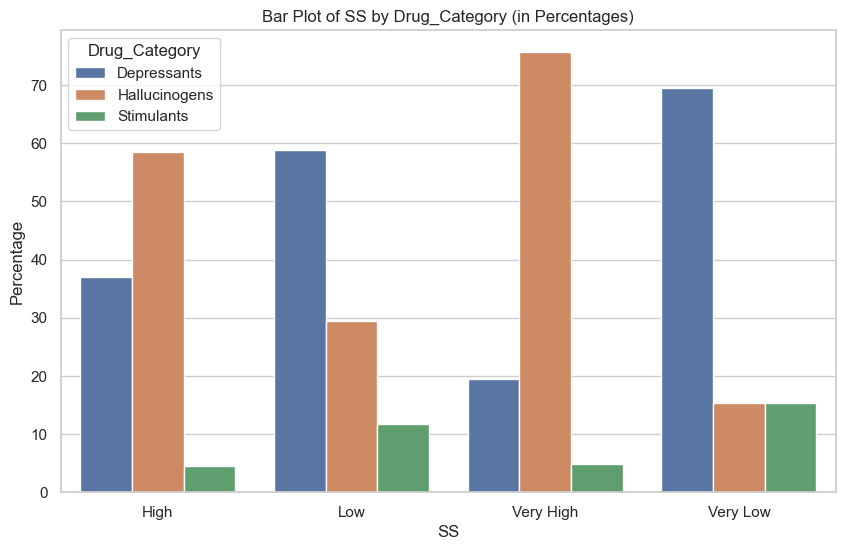

In [172]:
# List of score columns
score_columns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

# Loop through each score column and plot the percentage bar plot
for score_col in score_columns:
    # Calculate the percentages for each combination of the score column and Drug_Category
    df_percentage = df.groupby([score_col, 'Drug_Category']).size().reset_index(name='Count')
    df_percentage['Percentage'] = df_percentage['Count'] / df_percentage.groupby(score_col)['Count'].transform('sum') * 100
    
    # Create a bar plot with percentages
    plt.figure(figsize=(10, 6))
    sns.barplot(x=score_col, y='Percentage', hue='Drug_Category', data=df_percentage)
    
    # Set labels and title
    plt.xlabel(score_col)
    plt.ylabel('Percentage')
    plt.title(f'Bar Plot of {score_col} by Drug_Category (in Percentages)')
    
    # Show the plot
    plt.show()

In [173]:
df['SS'].unique()

array(['Very Low', 'Low', 'High', 'Very High'], dtype=object)

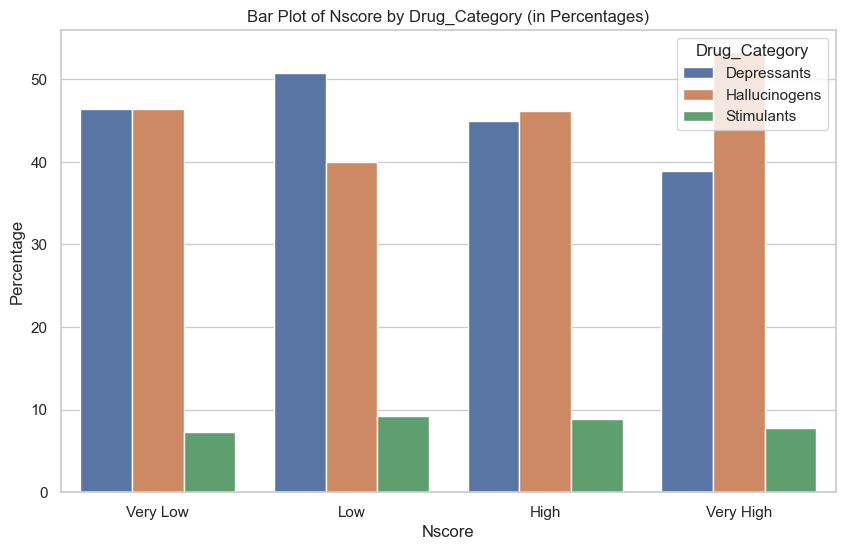

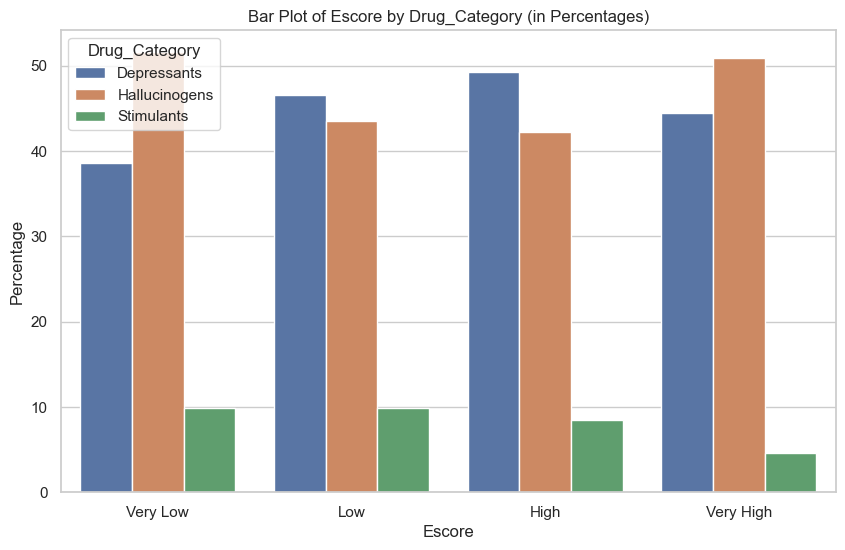

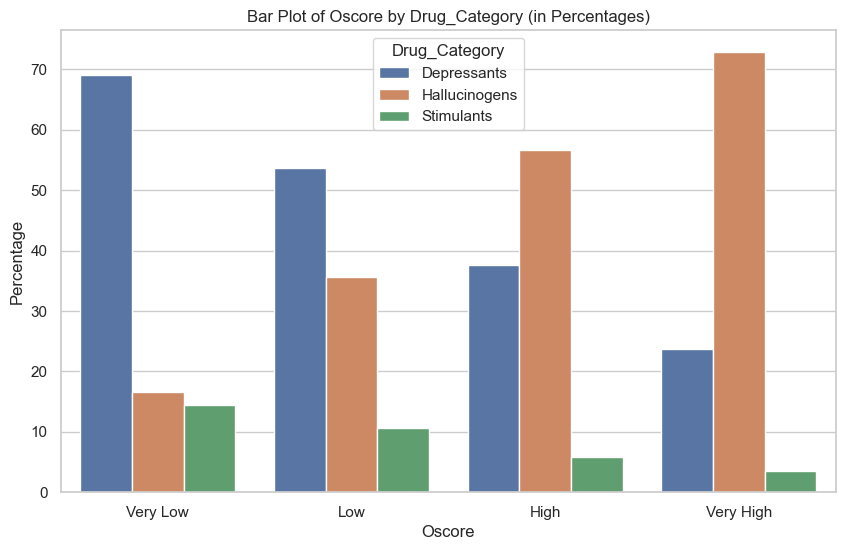

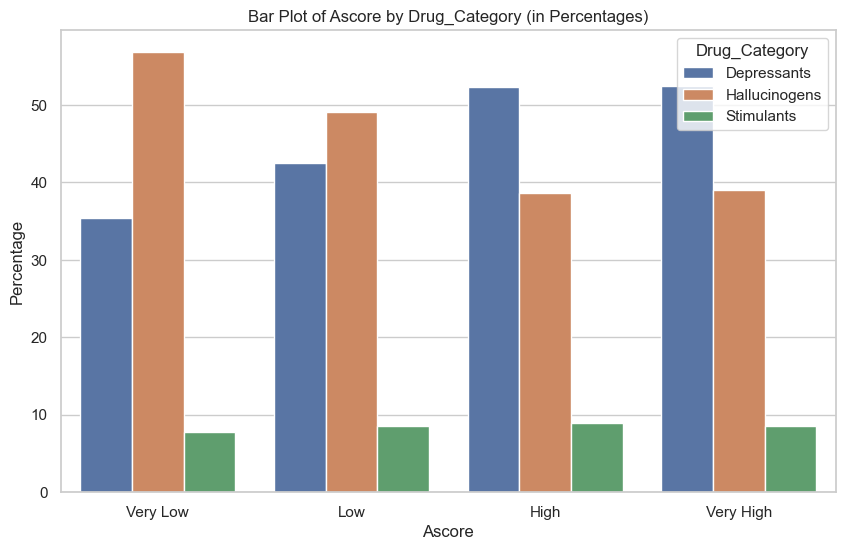

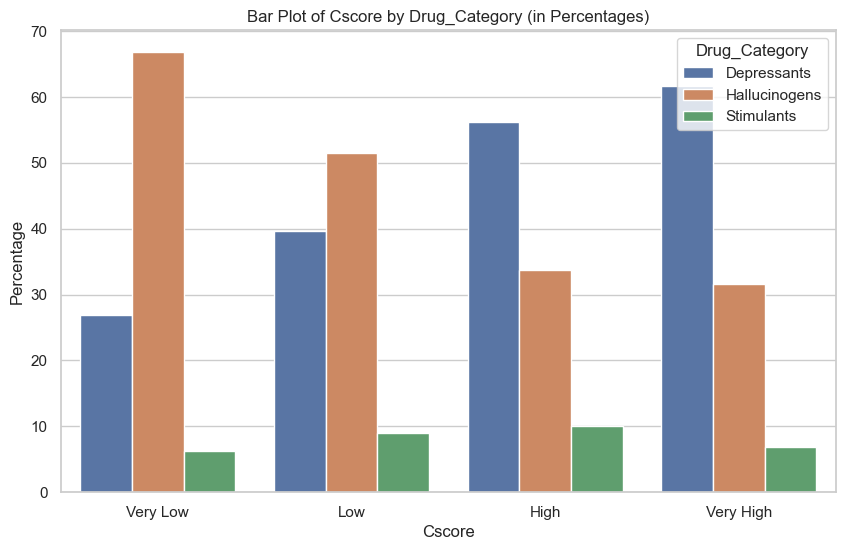

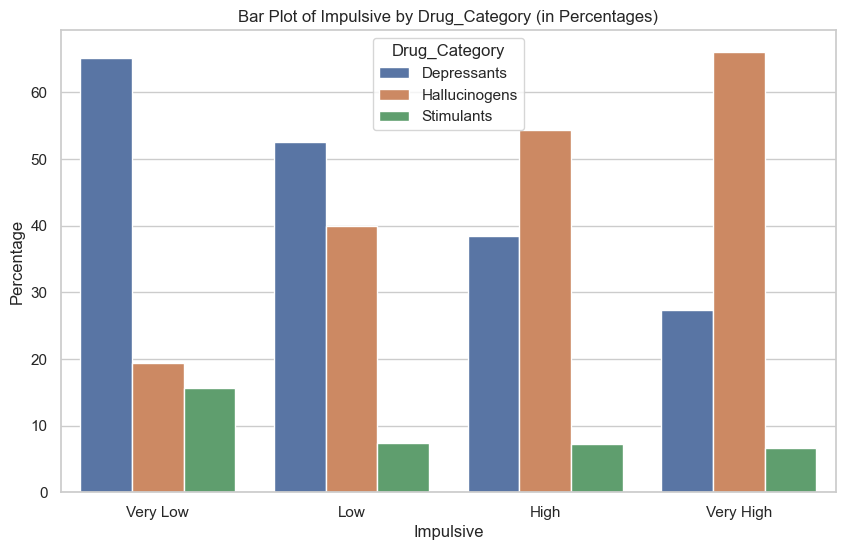

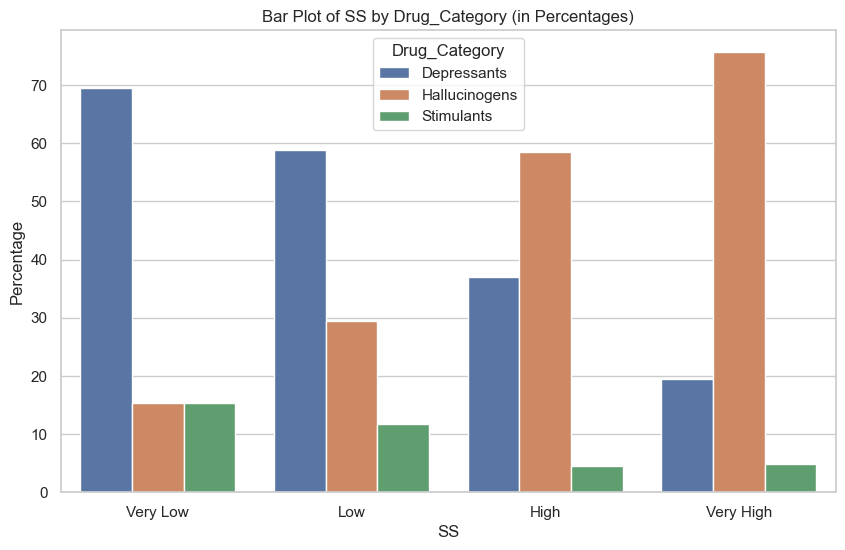

In [174]:
# Define the desired order for the categories
categories_order = ['Very Low', 'Low', 'High', 'Very High']

# Convert each score column to an ordered categorical type
for score_col in score_columns:
    df[score_col] = pd.Categorical(df[score_col], categories=categories_order, ordered=True)

# Loop through each score column and plot the percentage bar plot
for score_col in score_columns:
    # Calculate the percentages for each combination of the score column and Drug_Category
    df_percentage = df.groupby([score_col, 'Drug_Category']).size().reset_index(name='Count')
    df_percentage['Percentage'] = df_percentage['Count'] / df_percentage.groupby(score_col)['Count'].transform('sum') * 100
    
    # Create a bar plot with percentages
    plt.figure(figsize=(10, 6))
    sns.barplot(x=score_col, y='Percentage', hue='Drug_Category', data=df_percentage, order=categories_order)
    
    # Set labels and title
    plt.xlabel(score_col)
    plt.ylabel('Percentage')
    plt.title(f'Bar Plot of {score_col} by Drug_Category (in Percentages)')
    
    # Show the plot
    plt.show()

In [176]:
df['Country'].unique()
df['Country'].value_counts()

Country
UK                     1040
USA                     550
Other                   118
Canada                   87
Australia                52
Republic of Ireland      20
New Zealand               5
Name: count, dtype: int64

In [177]:
df['Country'] = df['Country'].replace({'Other': 'other', 'Canada': 'other','Australia': 'other','Republic of Ireland': 'other','New Zealand': 'other'})

# Display the unique values in the 'Age' column to confirm the change
print(df['Country'].unique())

['UK' 'other' 'USA']


In [179]:
# Define drug groups
stimulants = ['Choc', 'Caff', 'Amphet', 'Coke', 'Crack', 'Meth', 'Nicotine']
depressants = ['Alcohol', 'Benzos', 'Heroin', 'Legalh', 'Amyl', 'VSA']
hallucinogens = ['LSD', 'Mushrooms', 'Ketamine', 'Cannabis', 'Ecstasy']

# Group the drugs and create a binary target variable for each group
drug_groups = {
    'stimulants': stimulants,
    'depressants': depressants,
    'hallucinogens': hallucinogens
}

# Initialize a dictionary to store the models and their results
models = {}
results = {}

# Feature columns
X = df[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS','Age', 'Gender', 'Education', 'Country']]

# Apply one-hot encoding to the features
X_encoded = pd.get_dummies(X, drop_first=True)

for group_name, drugs in drug_groups.items():
    # Create the target variable for the group (1 if any drug in the group is active, else 0)
    y = df[drugs].apply(lambda x: 1 if 'active' in x.values else 0, axis=1)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    # Initialize the model
    model = LogisticRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the training and test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate evaluation metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    
    # Calculate evaluation metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Store the model and results
    models[group_name] = model
    results[group_name] = {
        'train': {
            'accuracy': train_accuracy,
            'precision': train_precision,
            'recall': train_recall,
            'f1_score': train_f1,
            'roc_auc_score': train_roc_auc
        },
        'test': {
            'accuracy': test_accuracy,
            'precision': test_precision,
            'recall': test_recall,
            'f1_score': test_f1,
            'roc_auc_score': test_roc_auc
        }
    }
    
    # Print the results for the training set
    print(f"Training Results for {group_name.capitalize()}:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"ROC AUC Score: {train_roc_auc:.4f}")
    print("-" * 50)
    
    # Print the results for the test set
    print(f"Test Results for {group_name.capitalize()}:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"ROC AUC Score: {test_roc_auc:.4f}")
    print("-" * 50)

Training Results for Stimulants:
Accuracy: 0.9987
Precision: 0.9987
Recall: 1.0000
F1 Score: 0.9993
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Stimulants:
Accuracy: 0.9920
Precision: 0.9920
Recall: 1.0000
F1 Score: 0.9960
ROC AUC Score: 0.6586
--------------------------------------------------
Training Results for Depressants:
Accuracy: 0.8684
Precision: 0.8684
Recall: 1.0000
F1 Score: 0.9296
ROC AUC Score: 0.6677
--------------------------------------------------
Test Results for Depressants:
Accuracy: 0.8827
Precision: 0.8827
Recall: 1.0000
F1 Score: 0.9377
ROC AUC Score: 0.6092
--------------------------------------------------
Training Results for Hallucinogens:
Accuracy: 0.8103
Precision: 0.8033
Recall: 0.7752
F1 Score: 0.7890
ROC AUC Score: 0.8920
--------------------------------------------------
Test Results for Hallucinogens:
Accuracy: 0.8507
Precision: 0.8418
Recall: 0.8110
F1 Score: 0.8261
ROC AUC Score: 0.9156
-----------------

In [182]:
# Define the models to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))
}

In [183]:
# Define the models to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVC(probability=True, random_state=42))
}



In [184]:
for group_name, drugs in drug_groups.items():
    # Create the target variable for the group (1 if any drug in the group is active, else 0)
    y = df[drugs].apply(lambda x: 1 if 'active' in x.values else 0, axis=1)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    for clf_name, clf in classifiers.items():
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict on the training and test set
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        # Calculate evaluation metrics for the training set
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        train_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
        
        # Calculate evaluation metrics for the test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
        
        # Store the results
        if group_name not in results:
            results[group_name] = {}
        
        results[group_name][clf_name] = {
            'train': {
                'accuracy': train_accuracy,
                'precision': train_precision,
                'recall': train_recall,
                'f1_score': train_f1,
                'roc_auc_score': train_roc_auc
            },
            'test': {
                'accuracy': test_accuracy,
                'precision': test_precision,
                'recall': test_recall,
                'f1_score': test_f1,
                'roc_auc_score': test_roc_auc
            }
        }
        
        # Print the results for the training set
        print(f"Training Results for {group_name.capitalize()} - {clf_name}:")
        print(f"Accuracy: {train_accuracy:.4f}")
        print(f"Precision: {train_precision:.4f}")
        print(f"Recall: {train_recall:.4f}")
        print(f"F1 Score: {train_f1:.4f}")
        print(f"ROC AUC Score: {train_roc_auc:.4f}")
        print("-" * 50)
        
        # Print the results for the test set
        print(f"Test Results for {group_name.capitalize()} - {clf_name}:")
        print(f"Accuracy: {test_accuracy:.4f}")
        print(f"Precision: {test_precision:.4f}")
        print(f"Recall: {test_recall:.4f}")
        print(f"F1 Score: {test_f1:.4f}")
        print(f"ROC AUC Score: {test_roc_auc:.4f}")
        print("-" * 50)

Training Results for Stimulants - Logistic Regression:
Accuracy: 0.9987
Precision: 0.9987
Recall: 1.0000
F1 Score: 0.9993
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Stimulants - Logistic Regression:
Accuracy: 0.9920
Precision: 0.9920
Recall: 1.0000
F1 Score: 0.9960
ROC AUC Score: 0.6586
--------------------------------------------------
Training Results for Stimulants - Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Stimulants - Random Forest:
Accuracy: 0.9920
Precision: 0.9920
Recall: 1.0000
F1 Score: 0.9960
ROC AUC Score: 0.4624
--------------------------------------------------
Training Results for Stimulants - Gradient Boosting:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Stimulants - Gradient Boosting

In [186]:
classifiers = {
    'K-Nearest Neighbors': make_pipeline(StandardScaler(), KNeighborsClassifier()),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [187]:
for group_name, drugs in drug_groups.items():
    # Create the target variable for the group (1 if any drug in the group is active, else 0)
    y = df[drugs].apply(lambda x: 1 if 'active' in x.values else 0, axis=1)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    for clf_name, clf in classifiers.items():
        # Train the model
        clf.fit(X_train, y_train)
        
        # Predict on the training and test set
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        # Calculate evaluation metrics for the training set
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred)
        train_recall = recall_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred)
        train_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
        
        # Calculate evaluation metrics for the test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
        
        # Store the results
        if group_name not in results:
            results[group_name] = {}
        
        results[group_name][clf_name] = {
            'train': {
                'accuracy': train_accuracy,
                'precision': train_precision,
                'recall': train_recall,
                'f1_score': train_f1,
                'roc_auc_score': train_roc_auc
            },
            'test': {
                'accuracy': test_accuracy,
                'precision': test_precision,
                'recall': test_recall,
                'f1_score': test_f1,
                'roc_auc_score': test_roc_auc
            }
        }
        
        # Print the results for the training set
        print(f"Training Results for {group_name.capitalize()} - {clf_name}:")
        print(f"Accuracy: {train_accuracy:.4f}")
        print(f"Precision: {train_precision:.4f}")
        print(f"Recall: {train_recall:.4f}")
        print(f"F1 Score: {train_f1:.4f}")
        print(f"ROC AUC Score: {train_roc_auc:.4f}")
        print("-" * 50)
        
        # Print the results for the test set
        print(f"Test Results for {group_name.capitalize()} - {clf_name}:")
        print(f"Accuracy: {test_accuracy:.4f}")
        print(f"Precision: {test_precision:.4f}")
        print(f"Recall: {test_recall:.4f}")
        print(f"F1 Score: {test_f1:.4f}")
        print(f"ROC AUC Score: {test_roc_auc:.4f}")
        print("-" * 50)

Training Results for Stimulants - K-Nearest Neighbors:
Accuracy: 0.9987
Precision: 0.9987
Recall: 1.0000
F1 Score: 0.9993
ROC AUC Score: 0.9987
--------------------------------------------------
Test Results for Stimulants - K-Nearest Neighbors:
Accuracy: 0.9920
Precision: 0.9920
Recall: 1.0000
F1 Score: 0.9960
ROC AUC Score: 0.4960
--------------------------------------------------
Training Results for Stimulants - Naive Bayes:
Accuracy: 0.9967
Precision: 1.0000
Recall: 0.9967
F1 Score: 0.9983
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Stimulants - Naive Bayes:
Accuracy: 0.9920
Precision: 0.9920
Recall: 1.0000
F1 Score: 0.9960
ROC AUC Score: 0.5000
--------------------------------------------------


D:\new\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:36:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Results for Stimulants - XGBoost:
Accuracy: 0.9987
Precision: 0.9987
Recall: 1.0000
F1 Score: 0.9993
ROC AUC Score: 0.9933
--------------------------------------------------
Test Results for Stimulants - XGBoost:
Accuracy: 0.9920
Precision: 0.9920
Recall: 1.0000
F1 Score: 0.9960
ROC AUC Score: 0.7984
--------------------------------------------------
Training Results for Depressants - K-Nearest Neighbors:
Accuracy: 0.8704
Precision: 0.8772
Recall: 0.9892
F1 Score: 0.9299
ROC AUC Score: 0.8443
--------------------------------------------------
Test Results for Depressants - K-Nearest Neighbors:
Accuracy: 0.8827
Precision: 0.8847
Recall: 0.9970
F1 Score: 0.9375
ROC AUC Score: 0.5165
--------------------------------------------------
Training Results for Depressants - Naive Bayes:
Accuracy: 0.7769
Precision: 0.8839
Recall: 0.8554
F1 Score: 0.8694
ROC AUC Score: 0.6265
--------------------------------------------------
Test Results for Depressants - Naive Bayes:
Accuracy: 0.7707
P

D:\new\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:36:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Results for Hallucinogens - K-Nearest Neighbors:
Accuracy: 0.8236
Precision: 0.8165
Recall: 0.7927
F1 Score: 0.8044
ROC AUC Score: 0.9101
--------------------------------------------------
Test Results for Hallucinogens - K-Nearest Neighbors:
Accuracy: 0.8000
Precision: 0.7697
Recall: 0.7744
F1 Score: 0.7720
ROC AUC Score: 0.8430
--------------------------------------------------
Training Results for Hallucinogens - Naive Bayes:
Accuracy: 0.7722
Precision: 0.7493
Recall: 0.7547
F1 Score: 0.7520
ROC AUC Score: 0.8310
--------------------------------------------------
Test Results for Hallucinogens - Naive Bayes:
Accuracy: 0.7813
Precision: 0.7228
Recall: 0.8110
F1 Score: 0.7644
ROC AUC Score: 0.8500
--------------------------------------------------
Training Results for Hallucinogens - XGBoost:
Accuracy: 0.9993
Precision: 0.9985
Recall: 1.0000
F1 Score: 0.9993
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Hallucinogens - XGBoost:
Accu

D:\new\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:36:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [188]:
# Initialize a dictionary to store the XGBoost model's results
xgboost_results = {}

In [189]:
for group_name, drugs in drug_groups.items():
    
    
    # Initialize the XGBoost model
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    
    # Train the model
    xgb_model.fit(X_train, y_train)
    
    # Predict on the training and test set
    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)
    
    # Calculate evaluation metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1])
    
    # Calculate evaluation metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
    
    # Store the results
    xgboost_results[group_name] = {
        'train': {
            'accuracy': train_accuracy,
            'precision': train_precision,
            'recall': train_recall,
            'f1_score': train_f1,
            'roc_auc_score': train_roc_auc
        },
        'test': {
            'accuracy': test_accuracy,
            'precision': test_precision,
            'recall': test_recall,
            'f1_score': test_f1,
            'roc_auc_score': test_roc_auc
        }
    }
    
    # Print the results for the training set
    print(f"Training Results for {group_name.capitalize()} - XGBoost:")
    print(f"Accuracy: {train_accuracy:.4f}")
    print(f"Precision: {train_precision:.4f}")
    print(f"Recall: {train_recall:.4f}")
    print(f"F1 Score: {train_f1:.4f}")
    print(f"ROC AUC Score: {train_roc_auc:.4f}")
    print("-" * 50)
    
    # Print the results for the test set
    print(f"Test Results for {group_name.capitalize()} - XGBoost:")
    print(f"Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {test_precision:.4f}")
    print(f"Recall: {test_recall:.4f}")
    print(f"F1 Score: {test_f1:.4f}")
    print(f"ROC AUC Score: {test_roc_auc:.4f}")
    print("-" * 50)

D:\new\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Results for Stimulants - XGBoost:
Accuracy: 0.9993
Precision: 0.9985
Recall: 1.0000
F1 Score: 0.9993
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Stimulants - XGBoost:
Accuracy: 0.7680
Precision: 0.7550
Recall: 0.6951
F1 Score: 0.7238
ROC AUC Score: 0.8452
--------------------------------------------------
Training Results for Depressants - XGBoost:
Accuracy: 0.9993
Precision: 0.9985
Recall: 1.0000
F1 Score: 0.9993
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Depressants - XGBoost:
Accuracy: 0.7680
Precision: 0.7550
Recall: 0.6951
F1 Score: 0.7238
ROC AUC Score: 0.8452
--------------------------------------------------


D:\new\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\new\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training Results for Hallucinogens - XGBoost:
Accuracy: 0.9993
Precision: 0.9985
Recall: 1.0000
F1 Score: 0.9993
ROC AUC Score: 1.0000
--------------------------------------------------
Test Results for Hallucinogens - XGBoost:
Accuracy: 0.7680
Precision: 0.7550
Recall: 0.6951
F1 Score: 0.7238
ROC AUC Score: 0.8452
--------------------------------------------------


In [191]:
import os
os.getcwd()

'C:\\Users\\E T E C H'